# EE 232 E Project 3 RL & IRL

# Part I RL

## Question 1 - 9

In [5]:
import numpy as np
from cvxopt import solvers, matrix

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)


import util
import pickle
import os
import pickle

Populating the interactive namespace from numpy and matplotlib


C:\Users\kgicmd\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
reward1 = np.zeros((10,10))
reward1[9,9] = 1

reward2 = np.zeros((10,10))
reward2[1:7,4] = -100
reward2[3:8,8] = -100
reward2[1,5] = -100
reward2[1:4,6] = -100
reward2[7:9,6] = -100
reward2[3,7] = -100
reward2[7,7] = -100
reward2[9,9] = 10

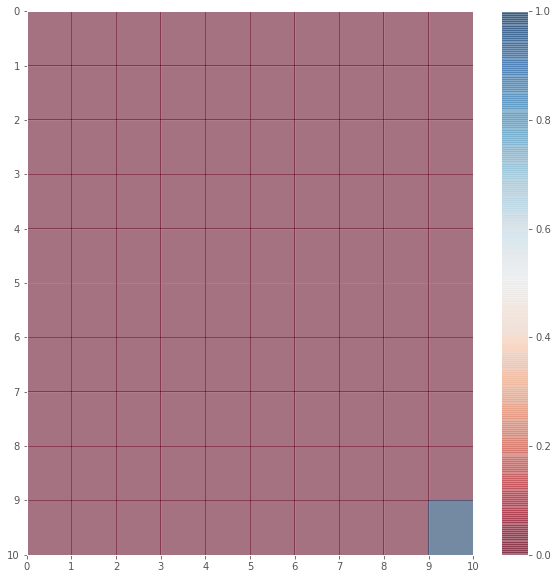

In [7]:
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.pcolor(reward1, cmap = "RdBu", alpha = 0.5)
plt.colorbar()
plt.grid()
plt.show()

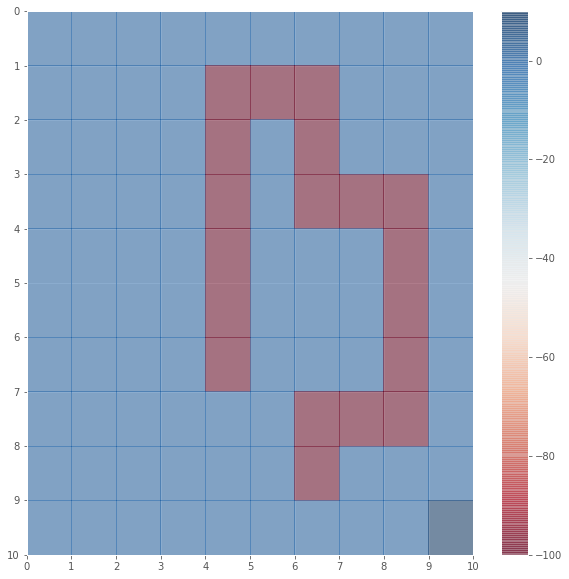

In [8]:
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.pcolor(reward2, cmap = "RdBu", alpha = 0.5)
plt.colorbar()
plt.grid()
plt.show()

In [9]:
mdp_process = util.MDP()
mdp_process.reward = reward1
#mdp_process.delta = 1e10 # should be a very large number
mdp_process.epsilon = 0.01
mdp_process.gamma = 0.8
mdp_process.w = 0.1

mdp_process.update()

10
delta = 0.12052571187470829
20
delta = 0.01200068146059638


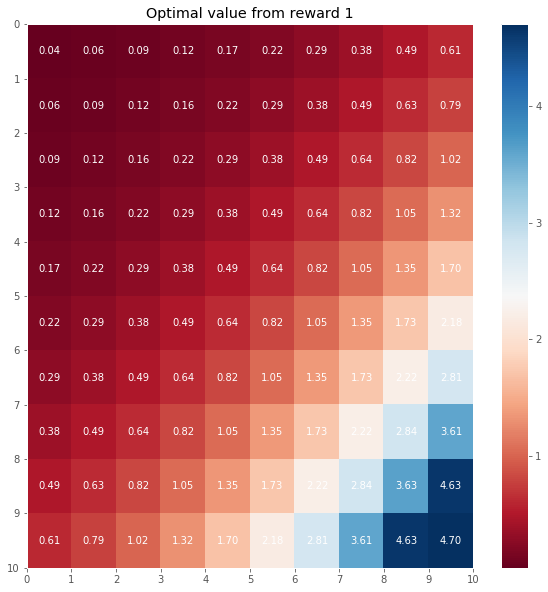

In [11]:
mdp_process.plot_value("Optimal value from reward 1")

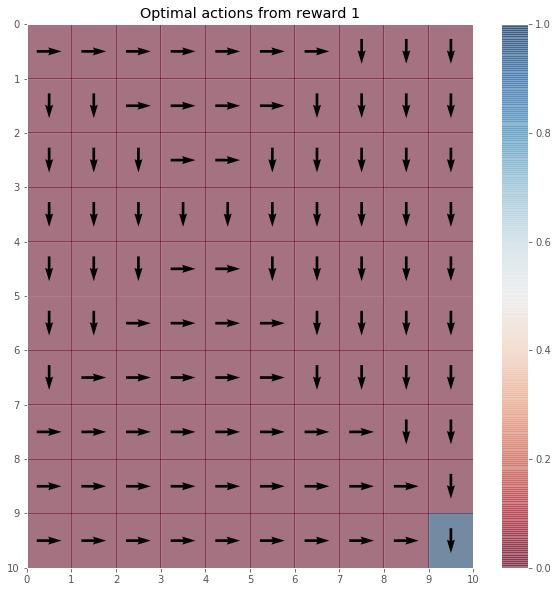

In [13]:
mdp_process.plot_action("Optimal actions from reward 1")

In [14]:
mdp_process2 = util.MDP()
mdp_process2.reward = reward2
#mdp_process2.delta = 1e10 # should be a very large number
mdp_process2.epsilon = 0.01
mdp_process2.gamma = 0.8
mdp_process2.w = 0.1

mdp_process2.update()

10
delta = 1.2048120096708175
20
delta = 0.12005715637385583
30
delta = 0.011861775462376434


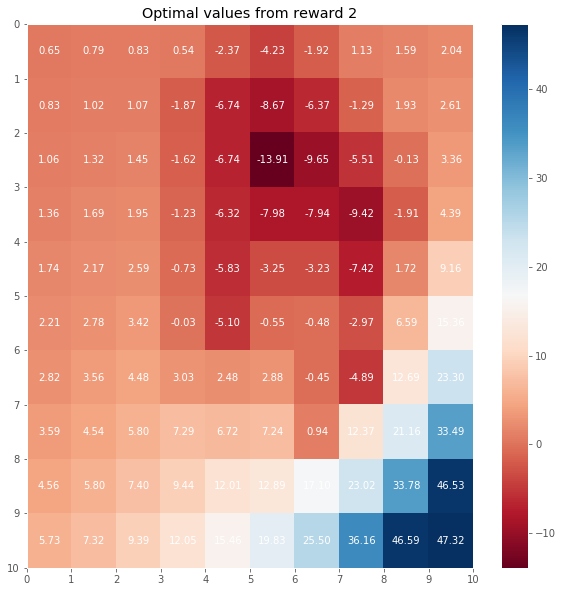

In [16]:
mdp_process2.plot_value("Optimal values from reward 2")

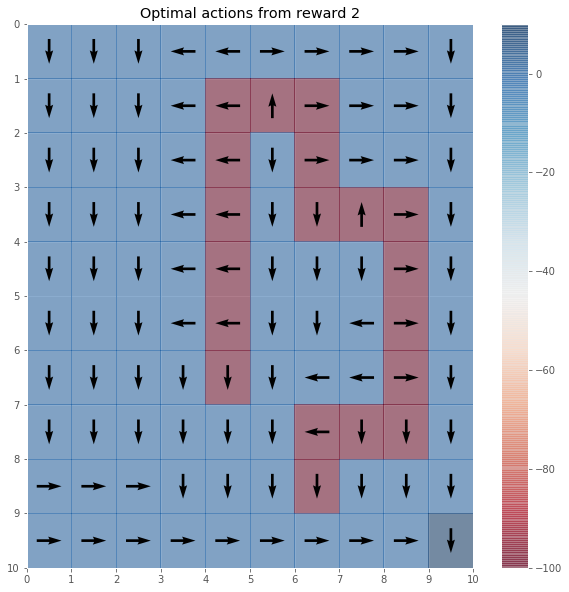

In [17]:
mdp_process2.plot_action("Optimal actions from reward 2")

# Part 2 IRL

In [18]:
def acc_calc(expert_action, new_action, lambda_range):
    acc = []
    for i in range(len(lambda_range)):
        accuracy = 0
        for j in range(10):
            for k in range(10):
                if expert_action[j][k] == new_action[i][j][k]:
                    accuracy += 1
        accuracy /= 100
        acc.append(accuracy)
        print('lambda = ' + str(lambda_range[i]) + ':  ' + str(accuracy))
    return acc

In [19]:
lambda_range = np.linspace(0, 5, 500)
r_1, r_2 = util.initial_reward_map()

action_dict = {0:'right', 1:'up', 2:'left', 3:'down'}
action_list = ['right','up','left','down']

for r_idx, rfunc in enumerate([r_1, r_2]):
    mdp_process = util.return_new_mdp(rfunc)
    action_data1 = mdp_process.action
    print (action_data1)

    process = []
    new_action = []
    M = util.construct_matrix_constant(mdp_process)

    for idx, coeffi_lambda in enumerate(lambda_range):
        print('Now is doing: ' + str(idx))
        c,D,b = util.get_c_D_b(coeffi_lambda, M, rfunc)
        calculated_reward = util.get_reward(c,D,b)
        new_reward_map = util.create_reward_map(calculated_reward)
        new_mdp = util.return_new_mdp(new_reward_map)
        process.append(new_mdp)
        new_action.append(new_mdp.action)
        #print (new_mdp.action)

    acc = acc_calc(action_data1, new_action, lambda_range)
    cwd = os.getcwd()
    with open(cwd + '\\lambda.pk', 'wb') as f:
        pickle.dump(lambda_range, f)
    with open (cwd + '\\acc_' + str(r_idx)+'.pk', 'wb') as f:
        pickle.dump(acc,f)

10
delta = 0.12052571187470829
20
delta = 0.01200068146059638
[[ 2.  2.  2.  2.  2.  2.  2.  3.  3.  3.]
 [ 3.  3.  2.  2.  2.  2.  3.  3.  3.  3.]
 [ 3.  3.  3.  2.  2.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  2.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  2.  2.  3.  3.  3.  3.  3.]
 [ 3.  3.  2.  2.  2.  3.  3.  3.  3.  3.]
 [ 3.  2.  2.  2.  2.  2.  3.  3.  3.  3.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  3.  3.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  3.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  3.]]
Now is doing: 0
10
delta = 0.1439762296122551
Now is doing: 1
10
delta = 0.1442089497585184
Now is doing: 2
10
delta = 0.14225029940693124
Now is doing: 3
10
delta = 0.14211606358913564
Now is doing: 4
10
delta = 0.14211606478439243
Now is doing: 5
10
delta = 0.1421160994159878
Now is doing: 6
10
delta = 0.14211609964092609
Now is doing: 7
10
delta = 0.1421160997247095
Now is doing: 8
10
delta = 0.14211609969792227
Now is doing: 9
10
delta = 0.1421160463047635
Now is doing: 10
10
delta = 0.142116050399

10
delta = 0.1676539626268363
20
delta = 0.009017294772045548
Now is doing: 122
10
delta = 0.16765395777500292
20
delta = 0.009017295399390668
Now is doing: 123
10
delta = 0.1677361847074108
20
delta = 0.009020995303393065
Now is doing: 124
10
delta = 0.16773737016619195
20
delta = 0.009020965482602172
Now is doing: 125
10
delta = 0.16773737926419052
20
delta = 0.009020965249743274
Now is doing: 126
10
delta = 0.1677373790660064
20
delta = 0.009020965262919345
Now is doing: 127
10
delta = 0.1677373792631538
20
delta = 0.009020965262239888
Now is doing: 128
10
delta = 0.16773737935800925
20
delta = 0.009020965259569746
Now is doing: 129
10
delta = 0.16773737946477252
20
delta = 0.009020965256527569
Now is doing: 130
10
delta = 0.1677373795214352
20
delta = 0.009020965258672575
Now is doing: 131
10
delta = 0.1677373798356132
20
delta = 0.009020965553735938
Now is doing: 132
10
delta = 0.1677373806830984
20
delta = 0.009020965596164832
Now is doing: 133
10
delta = 0.16773738559575402
20
d

10
delta = 0.11828320804243031
20
delta = 0.011437910322863232
Now is doing: 224
10
delta = 0.11828320729609221
20
delta = 0.011437910250692518
Now is doing: 225
10
delta = 0.11828320842341622
20
delta = 0.011437910359704873
Now is doing: 226
10
delta = 0.11828320963155647
20
delta = 0.011437910476531421
Now is doing: 227
10
delta = 0.11828321136156106
20
delta = 0.011437910643822491
Now is doing: 228
10
delta = 0.11828321315378254
20
delta = 0.011437910817128305
Now is doing: 229
10
delta = 0.11828321466223901
20
delta = 0.011437910962995623
Now is doing: 230
10
delta = 0.11828321861037949
20
delta = 0.01143791134477734
Now is doing: 231
10
delta = 0.11828321752480164
20
delta = 0.011437911239803533
Now is doing: 232
10
delta = 0.11828321791726015
20
delta = 0.01143791127775362
Now is doing: 233
10
delta = 0.1182832183693101
20
delta = 0.011437911321467098
Now is doing: 234
10
delta = 0.11828321875422354
20
delta = 0.011437911358687103
Now is doing: 235
10
delta = 0.11828321913864936


10
delta = 0.1193112845226727
20
delta = 0.011742679551420832
Now is doing: 326
10
delta = 0.11931128479983322
20
delta = 0.011742679610479423
Now is doing: 327
10
delta = 0.11931128619850107
20
delta = 0.011742679699217023
Now is doing: 328
10
delta = 0.1193112889887491
20
delta = 0.011742680340570577
Now is doing: 329
10
delta = 0.11931128637682065
20
delta = 0.011742679800839234
Now is doing: 330
10
delta = 0.11931129348060843
20
delta = 0.01174268103272652
Now is doing: 331
10
delta = 0.11931129740456026
20
delta = 0.011742681619060835
Now is doing: 332
10
delta = 0.11931129638548033
20
delta = 0.011742681470511773
Now is doing: 333
10
delta = 0.11931129244979388
20
delta = 0.011742680902591535
Now is doing: 334
10
delta = 0.11931128716434092
20
delta = 0.011742679831023867
Now is doing: 335
10
delta = 0.11931128601305918
20
delta = 0.011742679598412464
Now is doing: 336
10
delta = 0.11931131389699257
20
delta = 0.011742684022835126
Now is doing: 337
10
delta = 0.11931315085334226


10
delta = 0.11941065877988688
20
delta = 0.011752747447728334
Now is doing: 428
10
delta = 0.11941065879579327
20
delta = 0.011752747419589843
Now is doing: 429
10
delta = 0.11941065940157802
20
delta = 0.011752747645931566
Now is doing: 430
10
delta = 0.11941065938199102
20
delta = 0.011752747620815435
Now is doing: 431
10
delta = 0.11941065933792938
20
delta = 0.011752747608232417
Now is doing: 432
10
delta = 0.11941065930299466
20
delta = 0.01175274760234854
Now is doing: 433
10
delta = 0.11941065927587946
20
delta = 0.011752747594690499
Now is doing: 434
10
delta = 0.1194106592555304
20
delta = 0.011752747587015111
Now is doing: 435
10
delta = 0.119410659237972
20
delta = 0.011752747579700101
Now is doing: 436
10
delta = 0.1194106592232771
20
delta = 0.011752747572764871
Now is doing: 437
10
delta = 0.11941065921135774
20
delta = 0.011752747566166732
Now is doing: 438
10
delta = 0.1194106592020363
20
delta = 0.011752747559818255
Now is doing: 439
10
delta = 0.11941065919505434
20


lambda = 1.12224448898:  0.97
lambda = 1.13226452906:  0.97
lambda = 1.14228456914:  0.98
lambda = 1.15230460922:  0.98
lambda = 1.1623246493:  0.98
lambda = 1.17234468938:  0.97
lambda = 1.18236472946:  0.98
lambda = 1.19238476954:  0.98
lambda = 1.20240480962:  0.98
lambda = 1.2124248497:  0.97
lambda = 1.22244488978:  0.98
lambda = 1.23246492986:  0.97
lambda = 1.24248496994:  0.98
lambda = 1.25250501002:  0.98
lambda = 1.2625250501:  0.97
lambda = 1.27254509018:  0.97
lambda = 1.28256513026:  0.98
lambda = 1.29258517034:  0.98
lambda = 1.30260521042:  0.97
lambda = 1.3126252505:  0.98
lambda = 1.32264529058:  0.98
lambda = 1.33266533066:  0.97
lambda = 1.34268537074:  0.98
lambda = 1.35270541082:  0.98
lambda = 1.3627254509:  0.98
lambda = 1.37274549098:  0.97
lambda = 1.38276553106:  0.97
lambda = 1.39278557114:  0.98
lambda = 1.40280561122:  0.97
lambda = 1.4128256513:  0.97
lambda = 1.42284569138:  0.96
lambda = 1.43286573146:  0.97
lambda = 1.44288577154:  0.96
lambda = 1.45290

10
delta = 5.342723337036304
20
delta = 0.0848775269391524
Now is doing: 3
10
delta = 6.422512748629529
20
delta = 0.08417149586551886
Now is doing: 4
10
delta = 6.3455068800107455
20
delta = 0.0831694063030568
Now is doing: 5
10
delta = 6.345507146660168
20
delta = 0.0831694414727906
Now is doing: 6
10
delta = 6.9007113907956
20
delta = 0.08360367914845312
Now is doing: 7
10
delta = 6.901225354964218
20
delta = 0.08363036369071608
Now is doing: 8
10
delta = 6.902423951168487
20
delta = 0.08338457471236893
Now is doing: 9
10
delta = 6.902423953619319
20
delta = 0.08338457510768649
Now is doing: 10
10
delta = 6.902423619743502
20
delta = 0.08338456398304572
Now is doing: 11
10
delta = 6.90169850369184
20
delta = 0.0833852842267433
Now is doing: 12
10
delta = 6.962997405728231
20
delta = 0.09884682626505992
30
delta = 0.009555348342644265
Now is doing: 13
10
delta = 6.864547836193758
20
delta = 0.10988478346382635
30
delta = 0.009275280979693434
Now is doing: 14
10
delta = 6.864547776605

delta = 15.35994906778987
20
delta = 0.585237302051695
30
delta = 0.011266180036102469
Now is doing: 82
10
delta = 15.35940924574139
20
delta = 0.5852331558087513
30
delta = 0.011264335944019876
Now is doing: 83
10
delta = 15.359410020654565
20
delta = 0.5852331636785095
30
delta = 0.011264338574335397
Now is doing: 84
10
delta = 15.37121512069642
20
delta = 0.5853488841323156
30
delta = 0.011298119106470494
Now is doing: 85
10
delta = 15.370090442000944
20
delta = 0.5866905366679731
30
delta = 0.011078912602386026
Now is doing: 86
10
delta = 15.38194911541558
20
delta = 0.586691856869038
30
delta = 0.011077649169635606
Now is doing: 87
10
delta = 15.38555426232196
20
delta = 0.5871477681143773
30
delta = 0.011445629929255574
Now is doing: 88
10
delta = 15.385554371664497
20
delta = 0.5871477612586773
30
delta = 0.011445629686818393
Now is doing: 89
10
delta = 15.385552038478522
20
delta = 0.587147850124083
30
delta = 0.011445631701690218
Now is doing: 90
10
delta = 15.123801018840368


delta = 12.198284689735797
20
delta = 0.480287450688877
30
delta = 0.041687734530057696
Now is doing: 157
10
delta = 12.198284629331287
20
delta = 0.4802874259179646
30
delta = 0.04168774028818234
Now is doing: 158
10
delta = 12.19828462992082
20
delta = 0.48028742533283264
30
delta = 0.04168774036565992
Now is doing: 159
10
delta = 12.198284325942243
20
delta = 0.4802874067573555
30
delta = 0.04168774286830512
Now is doing: 160
10
delta = 12.198284624439975
20
delta = 0.4802874237079209
30
delta = 0.04168774058132385
Now is doing: 161
10
delta = 12.198284691338738
20
delta = 0.48028742253133316
30
delta = 0.04168774069523806
Now is doing: 162
10
delta = 12.198285888168588
20
delta = 0.48028740312118146
30
delta = 0.04168774277627563
Now is doing: 163
10
delta = 12.198387777369582
20
delta = 0.4802873230284632
30
delta = 0.04168775203123687
Now is doing: 164
10
delta = 12.30019839217329
20
delta = 0.48028692101324566
30
delta = 0.04168823491568219
Now is doing: 165
10
delta = 12.243335

delta = 12.031475162681602
20
delta = 1.1633353907771493
30
delta = 0.112483815377459
40
delta = 0.010876146049724866
Now is doing: 220
10
delta = 12.031475164816698
20
delta = 1.1633353909836615
30
delta = 0.11248381539735419
40
delta = 0.010876146051714386
Now is doing: 221
10
delta = 12.031475158088426
20
delta = 1.1633353903331454
30
delta = 0.11248381533448537
40
delta = 0.010876146045575297
Now is doing: 222
10
delta = 12.031475162559559
20
delta = 1.1633353907661785
30
delta = 0.11248381537643581
40
delta = 0.01087614604961118
Now is doing: 223
10
delta = 12.03147516812271
20
delta = 1.1633353913042015
30
delta = 0.1124838154283907
40
delta = 0.0108761460546134
Now is doing: 224
10
delta = 12.034550052060126
20
delta = 1.163633053875344
30
delta = 0.11251260020588916
40
delta = 0.010878929313378194
Now is doing: 225
10
delta = 12.03455004217733
20
delta = 1.1636330529198062
30
delta = 0.1125126001135186
40
delta = 0.010878929304396934
Now is doing: 226
10
delta = 12.034550039467

lambda = 4.35871743487:  0.35
lambda = 4.36873747495:  0.36
lambda = 4.37875751503:  0.35
lambda = 4.38877755511:  0.35
lambda = 4.39879759519:  0.36
lambda = 4.40881763527:  0.36
lambda = 4.41883767535:  0.36
lambda = 4.42885771543:  0.35
lambda = 4.43887775551:  0.35
lambda = 4.44889779559:  0.36
lambda = 4.45891783567:  0.36
lambda = 4.46893787575:  0.35
lambda = 4.47895791583:  0.35
lambda = 4.48897795591:  0.37
lambda = 4.49899799599:  0.36
lambda = 4.50901803607:  0.37
lambda = 4.51903807615:  0.37
lambda = 4.52905811623:  0.36
lambda = 4.53907815631:  0.36
lambda = 4.54909819639:  0.36
lambda = 4.55911823647:  0.36
lambda = 4.56913827655:  0.36
lambda = 4.57915831663:  0.37
lambda = 4.58917835671:  0.37
lambda = 4.59919839679:  0.37
lambda = 4.60921843687:  0.37
lambda = 4.61923847695:  0.37
lambda = 4.62925851703:  0.37
lambda = 4.63927855711:  0.39
lambda = 4.64929859719:  0.39
lambda = 4.65931863727:  0.39
lambda = 4.66933867735:  0.39
lambda = 4.67935871743:  0.39
lambda = 4

## Quesition 12

(0.95190380761523041, 0.98)


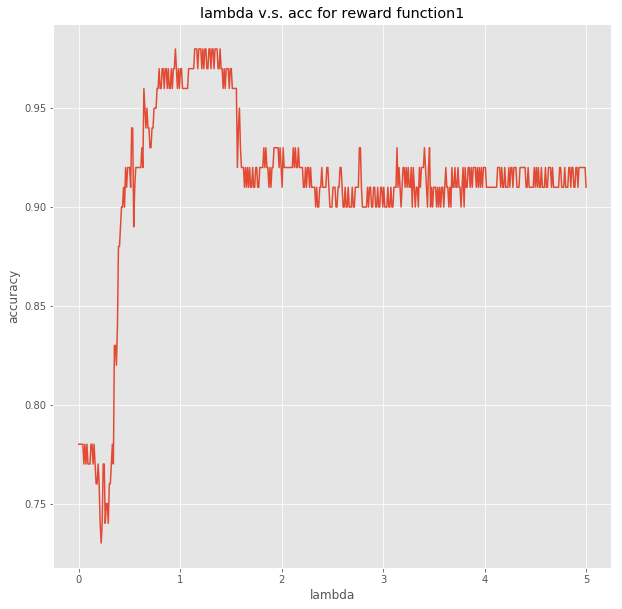

In [20]:
cwd = os.getcwd()

with open (cwd + '\\lambda.pk', 'rb') as f:
    lamb = pickle.load(f)
with open (cwd + '\\acc_0.pk', 'rb') as f:
    acc = pickle.load(f)

#print(acc)
idx = np.argmax(acc)
best_lamb = lamb[idx]
print((best_lamb, acc[idx]))
util.plot_curve(lamb, acc, 'lambda v.s. acc for reward function1')

## Question 13

10
delta = 0.12052571187470829
20
delta = 0.01200068146059638


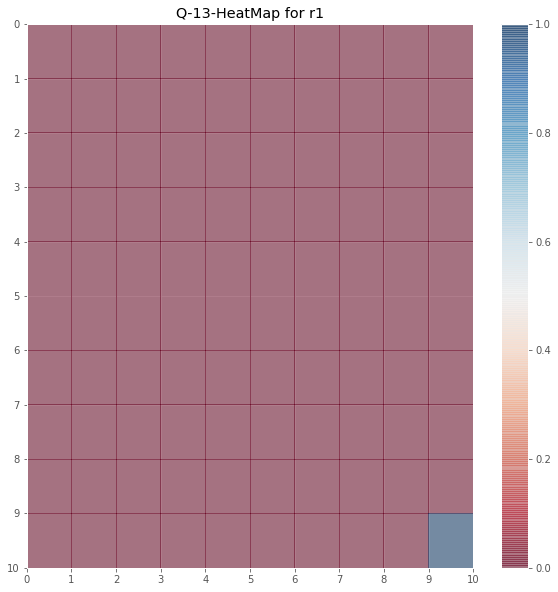

In [23]:
r_1, r_2 = util.initial_reward_map()
rfunc = r_1
mdp_process = util.return_new_mdp(rfunc)
util.plot_heat_map(r_1, "Q-13-HeatMap for r1")

10
delta = 0.1675619547320939
20
delta = 0.009015287306666564


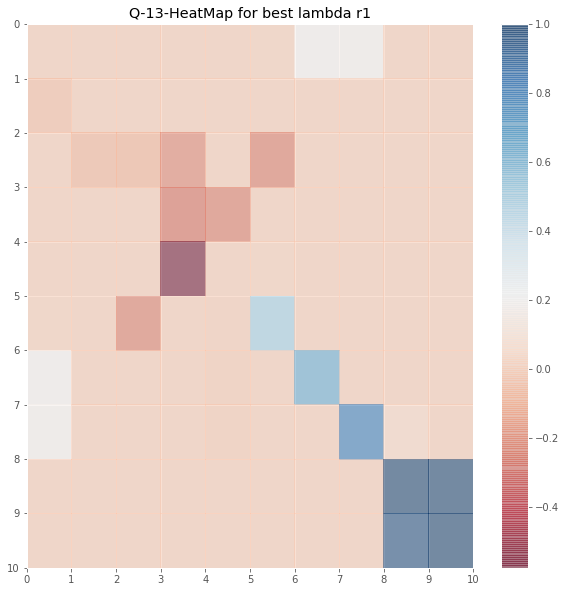

In [24]:
M = util.construct_matrix_constant(mdp_process)
c, D, b = util.get_c_D_b(best_lamb, M, rfunc)
calculated_reward = util.get_reward(c, D, b)
new_reward_map = util.create_reward_map(calculated_reward)
new_mdp = util.return_new_mdp(new_reward_map)
#print (new_reward_map)
util.plot_heat_map(new_reward_map, "Q-13-HeatMap for best lambda r1")

## Question 14

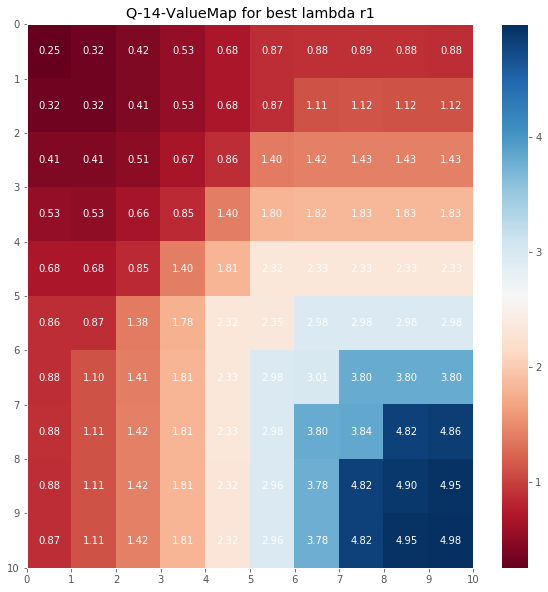

In [25]:
new_mdp.plot_value("Q-14-ValueMap for best lambda r1", text_reveal=True, decimal = 2)

## Question 15

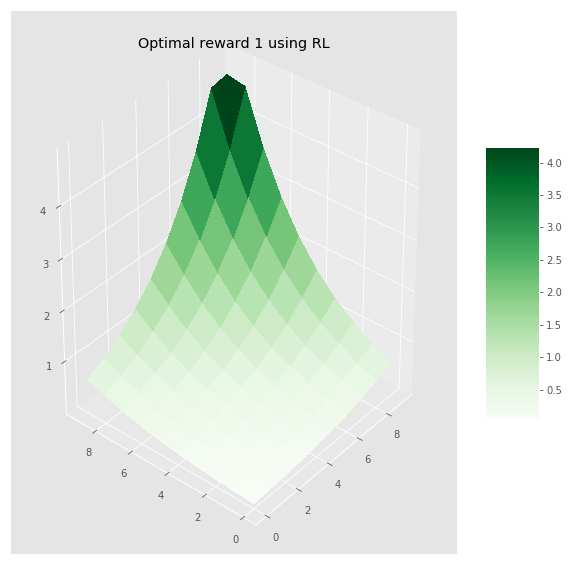

In [26]:
zlim = [0,0]
zlim[0] = np.min([np.min(mdp_process.V),np.min(new_mdp.V)])
zlim[1] = np.max([np.max(mdp_process.V),np.max(new_mdp.V)])
util.plot_mesh(mdp_process.V,"Optimal reward 1 using RL",zlim)

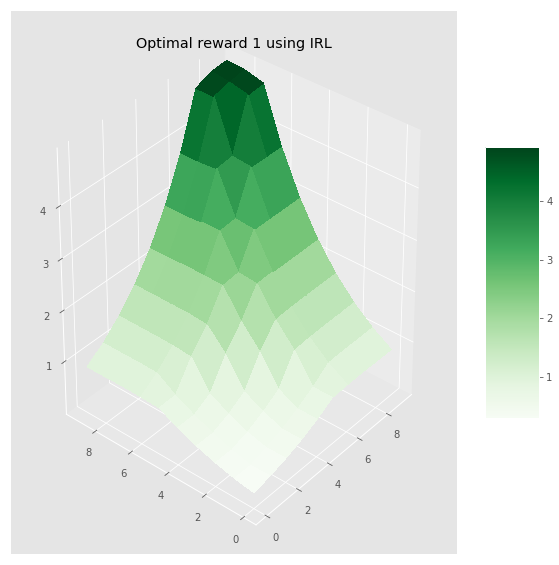

In [27]:
util.plot_mesh(new_mdp.V,"Optimal reward 1 using IRL",zlim)

## Question 16

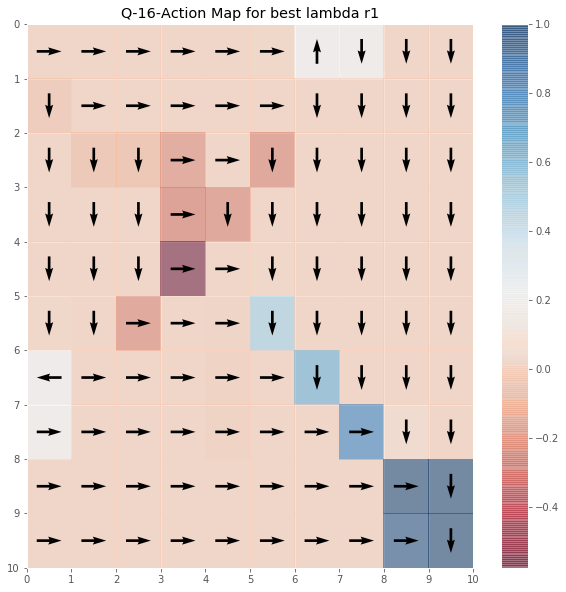

In [28]:
new_mdp.plot_action("Q-16-Action Map for best lambda r1")

## Question 17

In [30]:
pass

## Question 18

10
delta = 1.2048120096708175
20
delta = 0.12005715637385583
30
delta = 0.011861775462376434


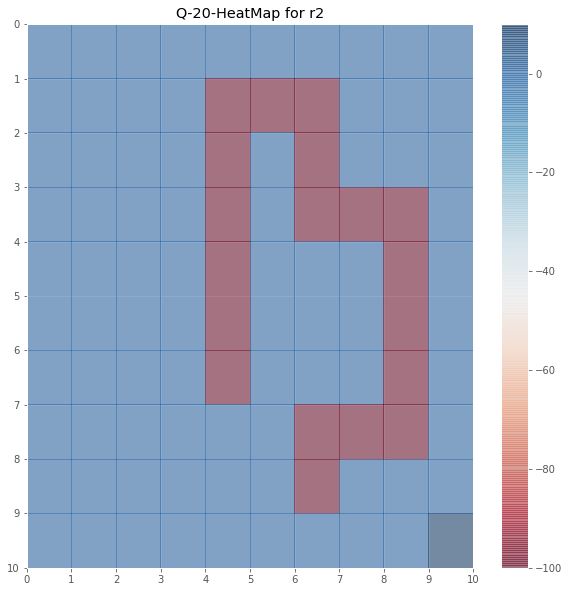

In [31]:
r_1, r_2 = util.initial_reward_map()
rfunc = r_2
mdp_process = util.return_new_mdp(rfunc)
util.plot_heat_map(rfunc, "Q-20-HeatMap for r2")

10
delta = 10.442768235611197
20
delta = 0.64923959996338
30
delta = 0.012209970952767435


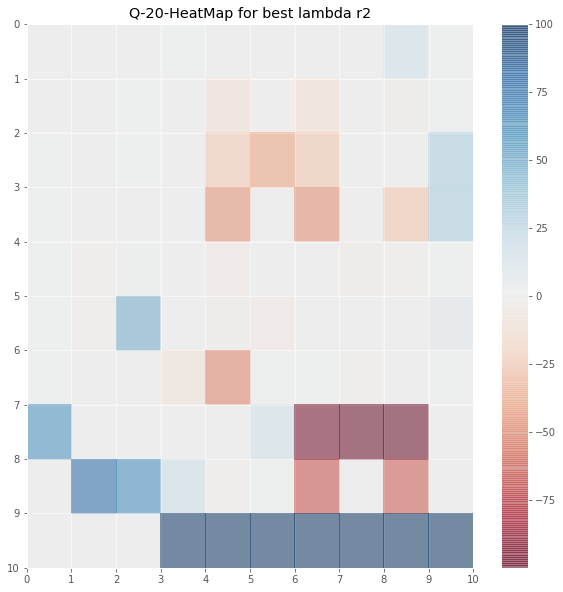

In [33]:
M = util.construct_matrix_constant(mdp_process)
c, D, b = util.get_c_D_b(best_lamb, M, rfunc)
calculated_reward = util.get_reward(c, D, b)
new_reward_map = util.create_reward_map(calculated_reward)
new_mdp2 = util.return_new_mdp(new_reward_map)
#print (new_reward_map)
util.plot_heat_map(new_reward_map, "Q-20-HeatMap for best lambda r2")

## Question 19

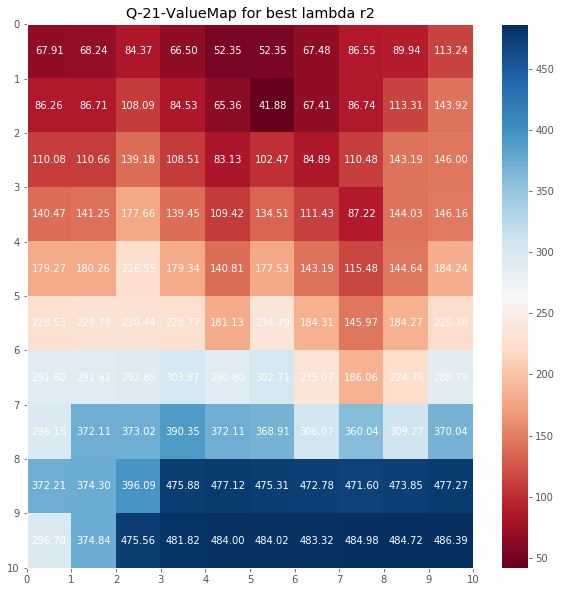

In [34]:
new_mdp2.plot_value("Q-21-ValueMap for best lambda r2", text_reveal=True, decimal = 2)

## Question 20

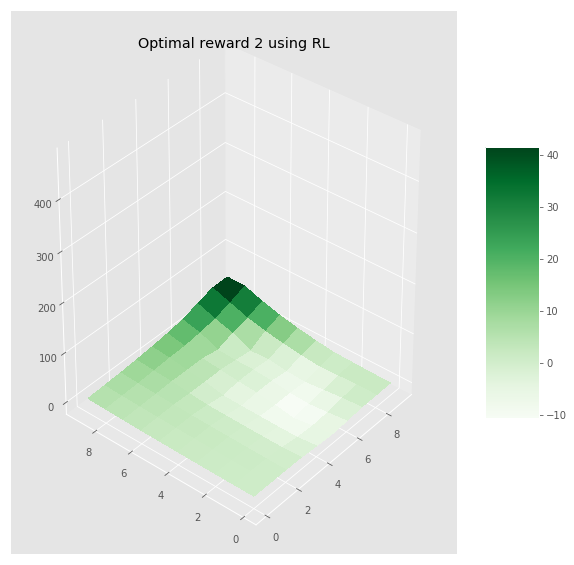

In [35]:
zlim2 = [0,0]
zlim2[0] = np.min([np.min(mdp_process2.V),np.min(new_mdp2.V)])
zlim2[1] = np.max([np.max(mdp_process2.V),np.max(new_mdp2.V)])
util.plot_mesh(mdp_process2.V,"Optimal reward 2 using RL",zlim2)

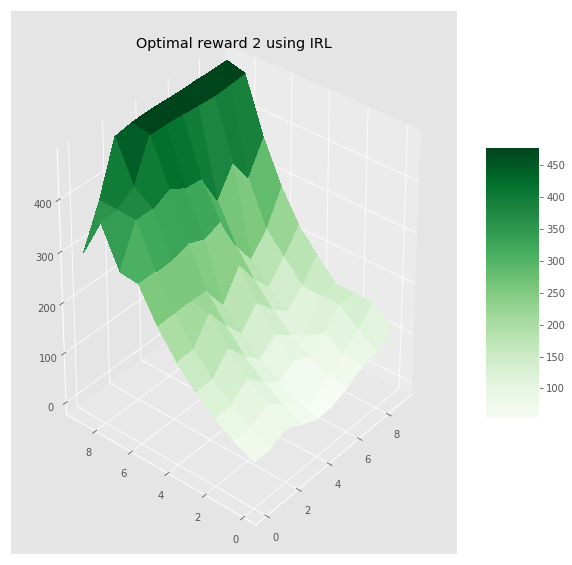

In [36]:
util.plot_mesh(new_mdp2.V,"Optimal reward 2 using IRL",zlim2)

## Question 21

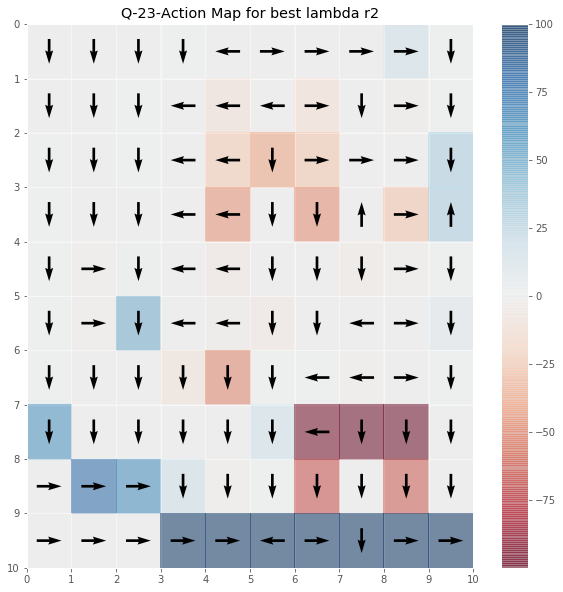

In [38]:
new_mdp2.plot_action("Q-23-Action Map for best lambda r2")